In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm


In [2]:
data = pd.read_excel('tomato_data_new.xlsx')


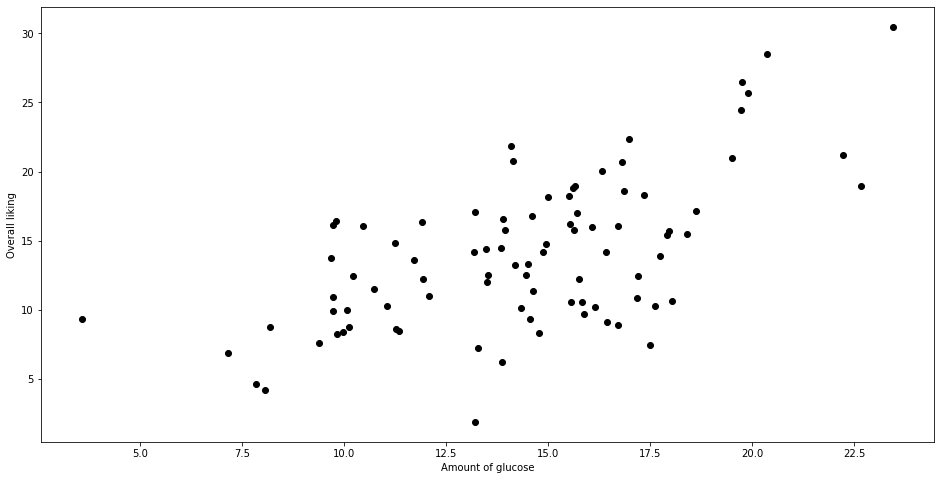

In [15]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['fructose'],
    data['OVERALL LIKING'],
    c='black'
)
plt.xlabel("Amount of glucose")
plt.ylabel("Overall liking")
plt.show()

In [16]:
X = data['fructose'].values.reshape(-1,1)
y = data['OVERALL LIKING'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 1.0533 + 0.89985X


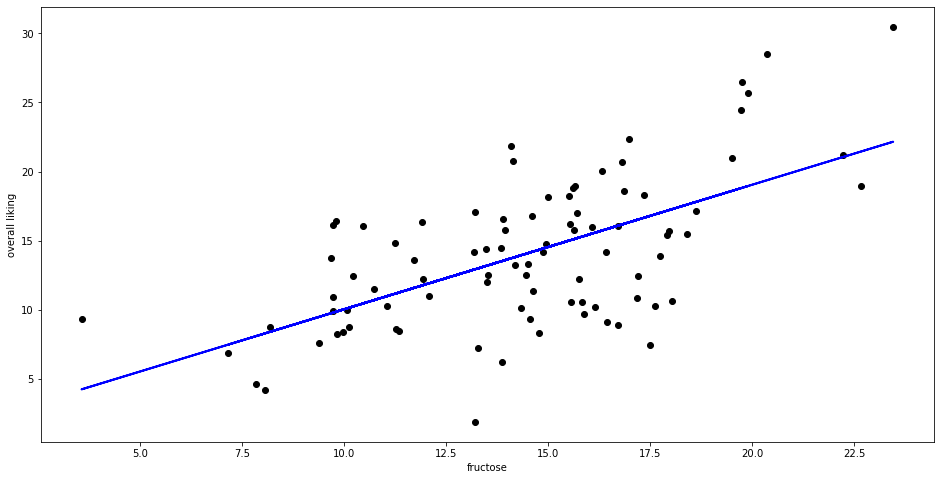

In [17]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['fructose'],
    data['OVERALL LIKING'],
    c='black'
)
plt.plot(
    data['fructose'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("fructose")
plt.ylabel("overall liking")
plt.show()

In [19]:
X = data['fructose']
y = data['OVERALL LIKING']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         OVERALL LIKING   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     51.58
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           2.20e-10
Time:                        19:16:50   Log-Likelihood:                -255.10
No. Observations:                  89   AIC:                             514.2
Df Residuals:                      87   BIC:                             519.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0533      1.859      0.567      0.5

In [37]:
def find_pvals(column):
    X = data[column]
    y = data['OVERALL LIKING']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    return est2.pvalues[1]

In [38]:
compounds = data.columns[12:]

In [56]:
p_table = pd.DataFrame(compounds)
p_table.columns = ['Compound']
p_table

,Compound
0,citric
1,malic acid
2,glucose
3,fructose
4,glutamic acid
...,...
64,"trans,trans-2,4-decadienal"
65,trans-2-heptenal
66,trans-2-hexenal
67,trans-2-pentenal


In [57]:
p_table['p_value'] = p_table['Compound'].apply(lambda x: find_pvals(x))

In [66]:
p_table.sort_values(by = ['p_value']).head(60)

,Compound,p_value
3,fructose,2.204080e-10
2,glucose,1.862785e-09
6,sugar:acid,2.433092e-05
26,4-carene,1.970898e-04
4,glutamic acid,3.180658e-04
31,benzaldehyde,4.746904e-04
61,prenyl acetate,5.825625e-03
60,phenylacetaldehyde,6.735268e-03
12,1-penten-3-one,9.139407e-03
67,trans-2-pentenal,1.291881e-02


In [79]:
SE = est2.HC3_se
DF = 

const       1.961040
fructose    0.142079
dtype: float64


(array([41., 37.,  8.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.]),
 array([ 0.10204278,  1.2089423 ,  2.31584182,  3.42274134,  4.52964086,
         5.63654038,  6.7434399 ,  7.85033942,  8.95723894, 10.06413846,
        11.17103798, 12.2779375 , 13.38483702, 14.49173654, 15.59863606,
        16.70553558, 17.8124351 ]),
 <a list of 16 Patch objects>)

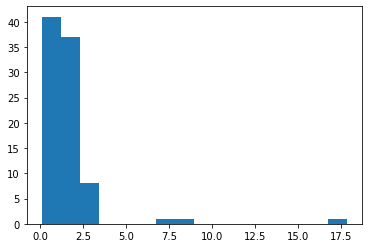

In [82]:
plt.hist(data['geranylacetone'], bins = 16)